In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('complaints.csv')
df.shape

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_9028/311151449.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('complaints.csv')


(3834782, 18)

In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [153]:
d=df.groupby('Company').count()[['Complaint ID']]


In [158]:
d.head()
print(type(d))

<class 'pandas.core.frame.DataFrame'>


In [171]:
# for index,row in d.iterrows():
#     print(row['Company'])
#     break
d.reset_index(inplace=True)
# for ele in d:
#     print(ele)

In [161]:
df[df['Timely response?']=='Yes'].head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-06-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,I purchased a vehicle from Regional Acceptance...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,IN,46804,Servicemember,Consent provided,Web,2023-06-24,Closed with explanation,Yes,NaN,7161475
1,2023-07-04,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,30228,NaN,NaN,Web,2023-07-04,In progress,Yes,NaN,7198133


In [174]:
t=df[df['Timely response?']=='Yes']

In [175]:
t.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-06-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,I purchased a vehicle from Regional Acceptance...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,IN,46804,Servicemember,Consent provided,Web,2023-06-24,Closed with explanation,Yes,NaN,7161475


In [177]:
c=df[df['Consumer disputed?']=='Yes']

In [179]:
c.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
120682,2016-08-02,Bank account or service,Checking account,"Making/receiving payments, sending money",NaN,NaN,NaN,JPMORGAN CHASE & CO.,TX,76179,Older American,NaN,Fax,2016-08-04,Closed with explanation,Yes,Yes,2041835
121927,2015-02-05,Credit card,NaN,Cash advance fee,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07047,NaN,NaN,Web,2015-02-05,Closed with explanation,Yes,Yes,1226301


In [180]:
c[c['Company']=='JPMORGAN CHASE & CO.'].shape[0]

9523

In [187]:
d.head(1)

,index,Company,Complaint ID
0,0,"(Former)Shapiro, Swertfeger & Hasty, LLP",12


In [189]:
c[c['Company']=='(Former)Shapiro, Swertfeger & Hasty, LLP'].shape[0]

0

In [167]:
t[t['Company']=='1 STOP MONEY CENTERS, LLC']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
202791,2019-07-23,"Payday loan, title loan, or personal loan",Payday loan,Problem with the payoff process at the end of ...,NaN,NaN,NaN,"1 STOP MONEY CENTERS, LLC",AZ,85044,NaN,NaN,Phone,2019-07-26,Closed with non-monetary relief,Yes,NaN,3315825
406670,2018-01-25,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,"On XX/XX/2017 at XXXX I ( XXXX XXXX ), spoke ...",Company believes it acted appropriately as aut...,"1 STOP MONEY CENTERS, LLC",AZ,85281,NaN,Consent provided,Web,2018-01-31,Closed with explanation,Yes,NaN,2792862
651119,2022-01-03,"Payday loan, title loan, or personal loan",Installment loan,Charged fees or interest you didn't expect,NaN,I called due to my job cutting our hours to ma...,Company believes it acted appropriately as aut...,"1 STOP MONEY CENTERS, LLC",AZ,85338,NaN,Consent provided,Web,2022-01-18,Closed with explanation,Yes,NaN,5064536
809299,2018-10-08,"Payday loan, title loan, or personal loan",Title loan,Struggling to pay your loan,NaN,"Afternoon, In XX/XX/XXXX I had o resign my agr...",Company has responded to the consumer and the ...,"1 STOP MONEY CENTERS, LLC",AZ,85204,NaN,Consent provided,Web,2018-10-12,Closed with monetary relief,Yes,NaN,3040399
1227447,2018-11-05,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,On XX/XX/2018 I went to the bank to pull money...,Company believes it acted appropriately as aut...,"1 STOP MONEY CENTERS, LLC",AZ,XXXXX,NaN,Consent provided,Web,2018-11-06,Closed with explanation,Yes,NaN,3066444
1935744,2016-10-28,Consumer Loan,Title loan,Charged fees or interest I didn't expect,NaN,NaN,NaN,"1 STOP MONEY CENTERS, LLC",AZ,85140,NaN,Consent not provided,Web,2017-01-30,Closed with explanation,Yes,No,2184609
3005109,2020-07-08,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,Company believes complaint relates to a discon...,"1 STOP MONEY CENTERS, LLC",AZ,85044,NaN,Consent not provided,Web,2020-07-08,Closed with non-monetary relief,Yes,NaN,3735289


In [168]:
# t=df.groupby(['Company','Timely response?']).count().head()


In [205]:
very_high_response=[]
high_response=[]
medium_response=[]
low_response=[]

very_high_dispute=[]
high_dispute=[]
medium_dispute=[]
low_dispute=[]

for index,row in d.iterrows():
    if row['Complaint ID']<5000:
        low_response.append((t[t['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
        low_dispute.append((c[c['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
    if row['Complaint ID']<10000 and row['Complaint ID']>5000:
        medium_response.append((t[t['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
        medium_dispute.append((c[c['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
    if row['Complaint ID']<50000 and row['Complaint ID']>10000:
        high_response.append((t[t['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
        high_dispute.append((c[c['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
    if row['Complaint ID']>50000:
        very_high_response.append((t[t['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
        very_high_dispute.append((c[c['Company']==row['Company']].shape[0]/row['Complaint ID'])*100)
    



In [209]:
import statistics as stat
round(stat.mean(high_response),2)


99.73

In [201]:
print(round(stat.mean(very_high_dispute),2))
print(round(stat.mean(very_high_response),2))

5.72
99.09


In [232]:
x_axis=['More than 50k', ' Between 10k and 50k',' Between 5k and 10k','Less than 5k']
y_axis_1=[round(stat.mean(very_high_response),2),round(stat.mean(high_response),2),round(stat.mean(medium_response),2),round(stat.mean(low_response),2)]

Text(0.5, 1.0, 'Timely Response Chart')

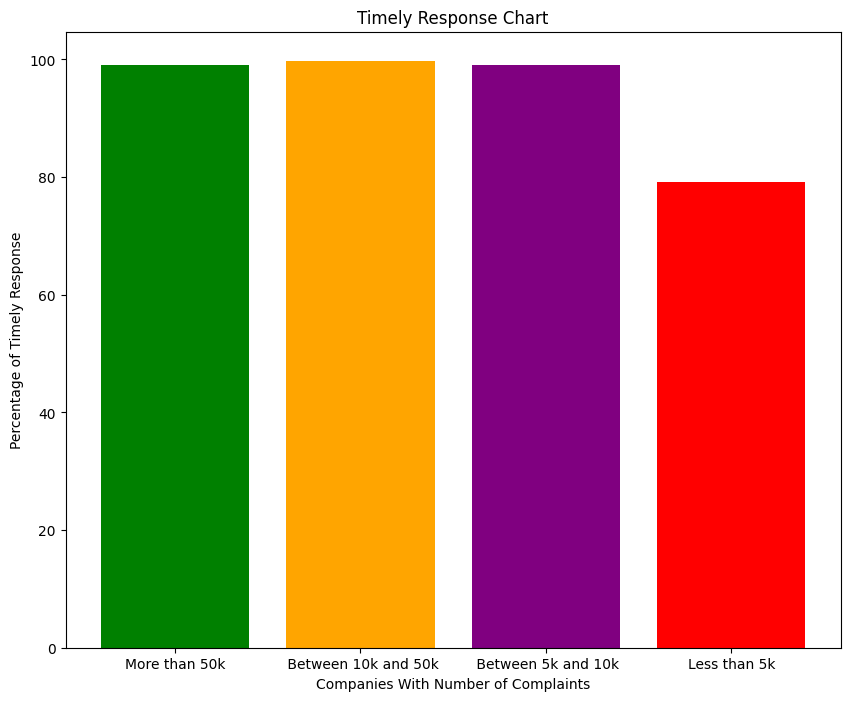

In [245]:
plt.figure(figsize=(10,8))
custom_colors = ['green', 'orange', 'purple','red']
plt.bar(x_axis,y_axis_1,color=custom_colors)
plt.xlabel("Companies With Number of Complaints")
plt.ylabel("Percentage of Timely Response")
plt.title("Timely Response Chart")
#plt.bar_label(y_axis_1)
#sns.barplot(y_axis,x_axis_1



In [237]:
x_axis=['More than 50k', ' Between 10k and 50k',' Between 5k and 10k','Less than 5k']
y_axis_2=[round(stat.mean(very_high_dispute),2),round(stat.mean(high_dispute),2),round(stat.mean(medium_dispute),2),round(stat.mean(low_dispute),2)]

Text(0.5, 1.0, 'Disputed Consumers Chart')

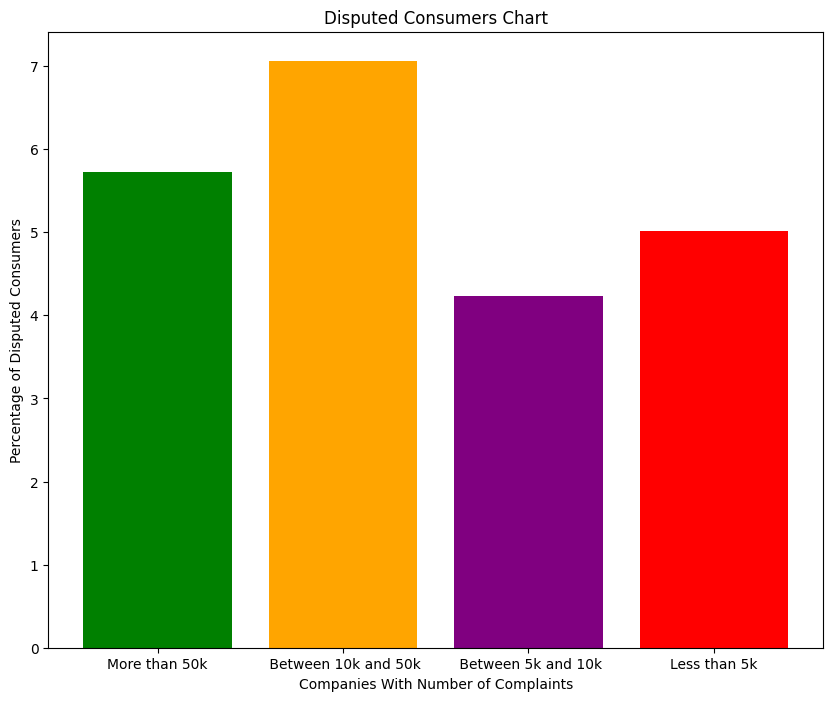

In [242]:
plt.figure(figsize=(10, 8))
custom_colors = ['green', 'orange', 'purple','red']
plt.bar(x_axis,y_axis_2,color=custom_colors)
plt.xlabel("Companies With Number of Complaints")
plt.ylabel("Percentage of Disputed Consumers")
plt.title("Disputed Consumers Chart")

In [185]:
print(low_dispute)

[0.0]


In [250]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [255]:
df.groupby(['Company','Product']).count().sort_values(by='Complaint ID',ascending=False)[['Complaint ID']].head(10)

,,Complaint ID
Company,Product,
"EQUIFAX, INC.","Credit reporting, credit repair services, or other personal consumer reports",657809
"TRANSUNION INTERMEDIATE HOLDINGS, INC.","Credit reporting, credit repair services, or other personal consumer reports",577939
Experian Information Solutions Inc.,"Credit reporting, credit repair services, or other personal consumer reports",524873
"EQUIFAX, INC.",Credit reporting,48128
"BANK OF AMERICA, NATIONAL ASSOCIATION",Mortgage,46765
WELLS FARGO & COMPANY,Mortgage,45445
Experian Information Solutions Inc.,Credit reporting,45378
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,39821
Ocwen Financial Corporation,Mortgage,31973


In [51]:
df_income=pd.read_csv('income.csv')
#df_population=pd.read_csv('population.csv')
df_population = pd.read_csv('population.csv', encoding='ISO-8859-1')



In [52]:
df_population['State']=df_population['State'].str.strip()

In [53]:
df_population.loc[:, 'State'] = df_population['State'].str.strip()


In [54]:
print(pd.merge(df_income,df_population, on='State'))

             State Median Income Code          Capital  Population  \
0          Alabama        51,113  AL       Montgomery    4,903,185   
1           Alaska        72,231  AK           Juneau      731,545   
2          Arizona        61,125  AZ          Phoenix    7,278,717   
3         Arkansas        48,829  AR      Little Rock    3,017,804   
4       California        69,759  CA       Sacramento   39,512,223   
5         Colorado        74,172  CO           Denver    5,758,736   
6      Connecticut        72,780  CT         Hartford    3,565,278   
7         Delaware        62,318  DE            Dover      973,764   
8          Florida        53,681  FL      Tallahassee   21,477,737   
9          Georgia        57,016  GA          Atlanta   10,617,423   
10          Hawaii        73,575  HI         Honolulu    1,415,872   
11           Idaho        60,208  ID            Boise    1,787,065   
12        Illinois        64,609  IL      Springfield   12,671,821   
13         Indiana  

In [56]:
df_state=pd.merge(df_income,df_population, on='State')
df_state.to_csv('State_Stat.csv',index=False)

In [57]:
# df_population.merge(df_income,on='State')
# df_population

In [42]:
df_population[df_population['State']=='Alabama']['State']

0    Alabama
Name: State, dtype: object

In [14]:
print(df_income)
print(df_population)


             State Median Income
0          Alabama        51,113
1           Alaska        72,231
2          Arizona        61,125
3         Arkansas        48,829
4       California        69,759
5         Colorado        74,172
6      Connecticut        72,780
7         Delaware        62,318
8             D.C.        83,382
9          Florida        53,681
10         Georgia        57,016
11          Hawaii        73,575
12           Idaho        60,208
13        Illinois        64,609
14         Indiana        58,873
15            Iowa        63,481
16          Kansas        57,872
17        Kentucky        51,348
18       Louisiana        43,903
19           Maine        51,664
20        Maryland        81,084
21   Massachusetts        73,227
22        Michigan        57,700
23       Minnesota        71,920
24     Mississippi        43,441
25        Missouri        56,885
26         Montana        59,087
27        Nebraska        59,619
28          Nevada        56,550
29   New H

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [244]:
df.iloc[0]

Date received                                                          2023-06-24
Product                         Credit reporting, credit repair services, or o...
Sub-product                                                      Credit reporting
Issue                                        Incorrect information on your report
Sub-issue                                                Account status incorrect
Consumer complaint narrative    I purchased a vehicle from Regional Acceptance...
Company public response         Company has responded to the consumer and the ...
Company                                              TRUIST FINANCIAL CORPORATION
State                                                                          IN
ZIP code                                                                    46804
Tags                                                                Servicemember
Consumer consent provided?                                       Consent provided
Submitted via   

In [6]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    2022217
Debt collection                                                                  493624
Mortgage                                                                         380138
Credit card or prepaid card                                                      196530
Checking or savings account                                                      173009
Credit reporting                                                                 140429
Credit card                                                                       89190
Bank account or service                                                           86205
Student loan                                                                      75129
Money transfer, virtual currency, or money service                                56246
Vehicle loan or lease                                                             45247
Consumer Loan                   

In [7]:
df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']['Company'].value_counts().head(10)

EQUIFAX, INC.                             657809
TRANSUNION INTERMEDIATE HOLDINGS, INC.    577939
Experian Information Solutions Inc.       524873
CAPITAL ONE FINANCIAL CORPORATION          21026
SYNCHRONY FINANCIAL                         8853
CITIBANK, N.A.                              8769
LEXISNEXIS                                  8732
JPMORGAN CHASE & CO.                        8647
WELLS FARGO & COMPANY                       7568
BANK OF AMERICA, NATIONAL ASSOCIATION       7507
Name: Company, dtype: int64

In [59]:
df_credit=df[df['Product']=='Credit reporting, credit repair services, or other personal consumer reports']
df_credit.shape

(2022217, 18)

In [9]:
df_credit.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [10]:
df_credit['Date sent to company'].min()

'2017-04-24'

In [19]:
df_credit[df_credit['Timely response?']=='Yes']['Company'].value_counts().head(10)

EQUIFAX, INC.                             656065
TRANSUNION INTERMEDIATE HOLDINGS, INC.    577626
Experian Information Solutions Inc.       524838
CAPITAL ONE FINANCIAL CORPORATION          21021
SYNCHRONY FINANCIAL                         8853
CITIBANK, N.A.                              8762
LEXISNEXIS                                  8697
JPMORGAN CHASE & CO.                        8647
WELLS FARGO & COMPANY                       7443
BANK OF AMERICA, NATIONAL ASSOCIATION       7033
Name: Company, dtype: int64

In [20]:
df_credit[df_credit['Timely response?']=='No']['Company'].value_counts().head(10)

EQUIFAX, INC.                             1744
BANK OF AMERICA, NATIONAL ASSOCIATION      474
TRANSUNION INTERMEDIATE HOLDINGS, INC.     313
Credit Karma, LLC                          163
Colony Brands, Inc.                        145
Genesis FS Card Services, Inc.             135
WELLS FARGO & COMPANY                      125
Atlanticus Services Corporation            112
Self Financial Inc.                         95
Screening Reports Inc.                      84
Name: Company, dtype: int64

In [80]:
df_credit.groupby('State').count()['Complaint ID'].sort_values(ascending=False).head(10)

State
FL    263805
TX    232359
CA    207450
GA    161452
NY    123772
PA    112924
IL     84932
NC     73744
NJ     61969
AL     51423
Name: Complaint ID, dtype: int64

In [29]:
df_credit.groupby('State').agg({'Complaint ID':'count'}).sort_values(by='Complaint ID',ascending=False).head()

,Complaint ID
State,
FL,263805
TX,232359
CA,207450
GA,161452
NY,123772


In [81]:
df_mortgage=df[df['Product']=='Mortgage']


In [82]:
df_mortgage.groupby('State').count()['Complaint ID'].sort_values(ascending=False).head(10)

State
CA    61483
FL    39490
NY    23412
TX    21795
GA    18732
NJ    17521
MD    14078
IL    13147
PA    13001
VA    12098
Name: Complaint ID, dtype: int64

In [83]:
df_mortgage.groupby('Company').count()['Complaint ID'].sort_values(ascending=False).head(10)

Company
BANK OF AMERICA, NATIONAL ASSOCIATION    46765
WELLS FARGO & COMPANY                    45445
Ocwen Financial Corporation              31973
Mr. Cooper Group Inc.                    26188
JPMORGAN CHASE & CO.                     23989
Ditech Financial LLC                     13629
SELECT PORTFOLIO SERVICING, INC.         12015
CITIBANK, N.A.                           10271
Shellpoint Partners, LLC                  7771
U.S. BANCORP                              7595
Name: Complaint ID, dtype: int64

In [88]:
df['State'].unique()

array(['IN', 'GA', 'NY', 'TX', 'IA', 'AR', 'PA', 'MI', 'NM', 'VA', 'FL',
       'MA', 'LA', 'OH', 'MS', 'CA', nan, 'WI', 'AL', 'NC', 'MN', 'NJ',
       'MO', 'NV', 'WA', 'CO', 'IL', 'MD', 'AE', 'AZ', 'OK', 'SC', 'TN',
       'KY', 'OR', 'HI', 'CT', 'DE', 'ID', 'GU', 'DC', 'NE', 'WV', 'ND',
       'MT', 'PR', 'RI', 'SD', 'VT', 'UT', 'AK', 'NH', 'KS', 'ME', 'WY',
       'AS', 'AP', 'VI', 'UNITED STATES MINOR OUTLYING ISLANDS', 'AA',
       'FM', 'MP', 'MH', 'PW'], dtype=object)

In [79]:
import numpy as np
df_complaints=df.dropna(subset='Consumer complaint narrative')

In [100]:
df_complaints['Consumer complaint narrative'].iloc[6]

"CREDIT CONTROL CORP failed to validate debt and prove a contractual agreement. Several rights were violated. Company 's Response was as follows CCC serves as an agent for the original creditors who own the debts assigned to us for collection. We do not purchase debt and are not subject to debt validation requirements for debt buyers. The debt is not mine. \n\nI have not supplied proof under the estoppel by silence, Engelhardt v. gravens ( mo ) 281 SW 715, 719, I presume that no proof of the alleged debt, nor therefore any such debt, in fact therefore exists."

In [101]:
from textblob import TextBlob

a=df_complaints['Consumer complaint narrative'].iloc[6]

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

0.06547619047619048


In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


# create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# get the sentiment of the text
text = df_complaints['Consumer complaint narrative'].iloc[6]
scores = analyzer.polarity_scores(text)

print(scores)
print(scores['compound'])

{'neg': 0.224, 'neu': 0.68, 'pos': 0.096, 'compound': -0.9196}
-0.9196


In [105]:
df_complaints['sentiment']=None

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_9028/4049974050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaints['sentiment']=None


In [106]:
df_complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'sentiment'],
      dtype='object')

In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


# create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()
for index,row in df_complaints.iterrows():
    text=row['Consumer complaint narrative']
    scores = analyzer.polarity_scores(text)
    df_complaints['sentiment'].iloc[index]=scores['compound']
    

/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_9028/1716581476.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaints['sentiment'].iloc[index]=scores['compound']


IndexError: iloc cannot enlarge its target object

In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Create an empty list to store sentiment scores
sentiment_scores = []

# Iterate through each row in df_complaints
for index, row in df_complaints.iterrows():
    text = row['Consumer complaint narrative']
    scores = analyzer.polarity_scores(text)
    sentiment_scores.append(scores['compound'])

# Add the sentiment scores list as a new column 'sentiment' in the DataFrame
df_complaints['sentiment'] = sentiment_scores


/var/folders/7f/p642xsys1qdb9c8hcs8s95gh0000gn/T/ipykernel_9028/1875276758.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaints['sentiment'] = sentiment_scores


In [120]:
df_complaints.iloc[1000]

Date received                                                          2023-06-20
Product                                               Credit card or prepaid card
Sub-product                            General-purpose credit card or charge card
Issue                             Problem with a purchase shown on your statement
Sub-issue                       Credit card company isn't resolving a dispute ...
Consumer complaint narrative    I charge my card for XXXX for flights with XXX...
Company public response         Company has responded to the consumer and the ...
Company                                                      Netspend Corporation
State                                                                          AZ
ZIP code                                                                    851XX
Tags                                                                          NaN
Consumer consent provided?                                       Consent provided
Submitted via   

In [121]:
df_complaints.to_csv('sentiment.csv')

In [84]:
df.shape

(3834782, 18)

In [76]:
if df_complaints['Consumer complaint narrative'].iloc[1].isnull():
    print("m")

AttributeError: 'float' object has no attribute 'isnull'

In [74]:
type(df_complaints['Consumer complaint narrative'].iloc[1])

float

In [68]:
from textblob import TextBlob

a=df_credit['Consumer complaint narrative'].iloc[0]

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

a="i am dissatisfied"

blob=TextBlob(a)
seti=blob.sentiment.polarity
print(seti)

-0.05535714285714285
0.0


In [61]:
df_credit['Consumer complaint narrative'].iloc[1]

nan

In [60]:
df_credit['Consumer complaint narrative'].iloc[0]

"I purchased a vehicle from Regional Acceptance XXXX, a XXXX XXXX XXXX. On XX/XX/XXXX, I was in a head on collision and the car was totaled, and reported as a total loss. In the month of XX/XX/XXXX I signed the car over as a total loss. XXXX XXXX XXXX company was to pay off the car in full that was the agreement before I signed the car over. XXXX XXXX sent the payoff amount to the wrong company and the other company cashed the check. It was never reported to me that Regional XXXX had not received the payment until XXXX when I went to go purchase another car and the finance company told me at the dealership I still had an open car loan. I then called Regional Acceptance about the car not being paid off and was informed they never received the check from the insurance company. I notified the insurance company and they said as soon as they received the check back they would re issue a check and pay Regional Acceptance. A couple weeks later Regional XXXX received payment. Never again did I

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")


# create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# get the sentiment of the text
text = df_credit['Consumer complaint narrative'].iloc[0]
scores = analyzer.polarity_scores(text)

print(scores)

{'neg': 0.038, 'neu': 0.851, 'pos': 0.111, 'compound': 0.9885}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matheen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [98]:
import spacy

nlp = spacy.load("en_core_web_sm")

def sentiment_analysis(text: str) -> float:
    doc = nlp(text)
    total_sentiment = 0.0
    num_tokens = 0
    for token in doc:
        if token.has_vector and token.vector_norm > 0:
            total_sentiment += token.sentiment
            num_tokens += 1
    if num_tokens > 0:
        print(total_sentiment)
        average_sentiment = total_sentiment / num_tokens
        return average_sentiment
    else:
        return 0.0

text = "I hate chocolate ice cream!"
sentiment = sentiment_analysis(text)
print(sentiment)


0.0
0.0


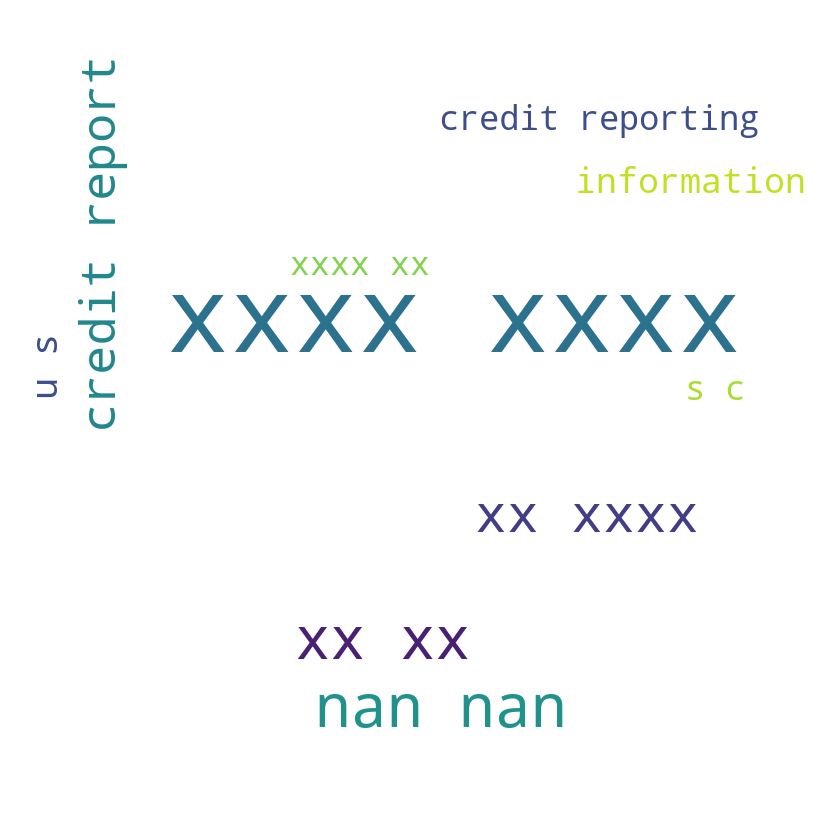

In [79]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_credit['Consumer complaint narrative']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, max_words=10,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [60]:
df_credit['Consumer complaint narrative'].isnull().value_counts()

True     1309927
False     712290
Name: Consumer complaint narrative, dtype: int64

In [12]:
df[df['Product']=='Debt collection']['Company'].value_counts().head(10)

PORTFOLIO RECOVERY ASSOCIATES INC         20024
ENCORE CAPITAL GROUP INC.                 18596
Resurgent Capital Services L.P.           11164
ERC                                       10344
CAPITAL ONE FINANCIAL CORPORATION          9277
EQUIFAX, INC.                              8436
TRANSUNION INTERMEDIATE HOLDINGS, INC.     8239
Experian Information Solutions Inc.        8185
I.C. System, Inc.                          7707
Convergent Resources, Inc.                 7476
Name: Company, dtype: int64

In [13]:
df[df['Product']=='Debt collection'].iloc[1]

Date received                                                                                                        2023-06-24
Product                                                                                                         Debt collection
Sub-product                                                                                                       Mortgage debt
Issue                                                                                         Attempts to collect debt not owed
Sub-issue                                                                                                     Debt is not yours
Consumer complaint narrative                                                                                                NaN
Company public response         Company has responded to the consumer and the CFPB and chooses not to provide a public response
Company                                                                                                 

In [14]:
df[df['Product']=='Mortgage']['Company'].value_counts().head(10)

BANK OF AMERICA, NATIONAL ASSOCIATION    46765
WELLS FARGO & COMPANY                    45445
Ocwen Financial Corporation              31973
Mr. Cooper Group Inc.                    26188
JPMORGAN CHASE & CO.                     23989
Ditech Financial LLC                     13629
SELECT PORTFOLIO SERVICING, INC.         12015
CITIBANK, N.A.                           10271
Shellpoint Partners, LLC                  7771
U.S. BANCORP                              7595
Name: Company, dtype: int64

In [15]:
df[df['Product']=='Mortgage'].iloc[1]

Date received                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2023-06-25
Product                                                                        

In [16]:
df['Sub-product'].value_counts()

Credit reporting                              2002093
Checking account                               196807
General-purpose credit card or charge card     150615
I do not know                                  109608
Other debt                                      96782
Conventional home mortgage                      93288
Other mortgage                                  86633
Credit card debt                                81474
Conventional fixed mortgage                     70607
Medical debt                                    52893
FHA mortgage                                    48065
Other (i.e. phone, health club, etc.)           44524
Federal student loan servicing                  38717
Loan                                            38118
Credit card                                     28692
Store credit card                               27067
Conventional adjustable mortgage (ARM)          25380
Non-federal student loan                        25162
Installment loan            